In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file="C:/Users/swast/OneDrive/Desktop/object recognition/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="./frozen_inference_graph.pb"

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name="./labels.txt"
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000284D29F47F0>

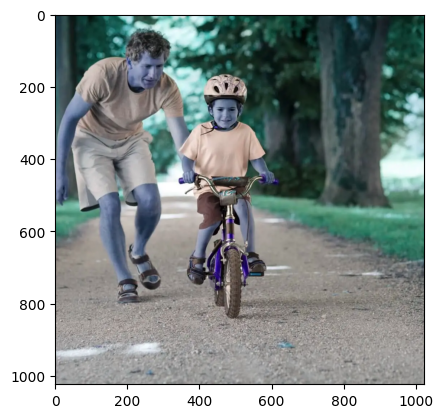

In [8]:
img=cv2.imread('./SAFETY-BLOG-1024x1024.webp')
plt.imshow(img)

In [9]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [10]:
print(ClassIndex)

[1 1 2]


In [11]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

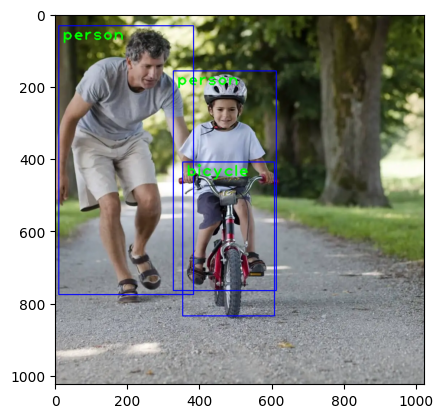

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
cap=cv2.VideoCapture('./mountain_bikers_during_daytime (720p).mp4')
# for webcam take cap=cv2.videoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("can't open the video") 
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)   
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('object detection',frame) 
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
cap.release()    
cv2.destroyallWindows()
               

()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
